In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df=pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
#target counts
df.target.value_counts()
#yes-165 no-138

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:title={'center':'heart disease count'}>

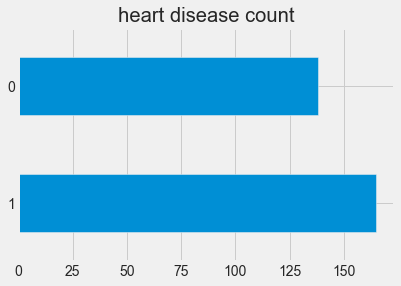

In [10]:
df.target.value_counts().plot(kind="barh",title="heart disease count")

In [11]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [12]:
#not having more unique values
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
#having more unique values
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

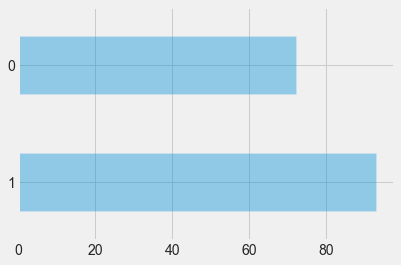

In [15]:
#have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
have=df.loc[df['target']==1,'sex'].value_counts().plot(kind="barh",alpha=0.4)

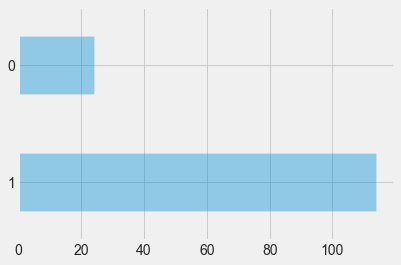

In [16]:
no_disease = df.loc[df['target']==0, 'sex'].value_counts().plot(kind="barh",alpha=0.4) 

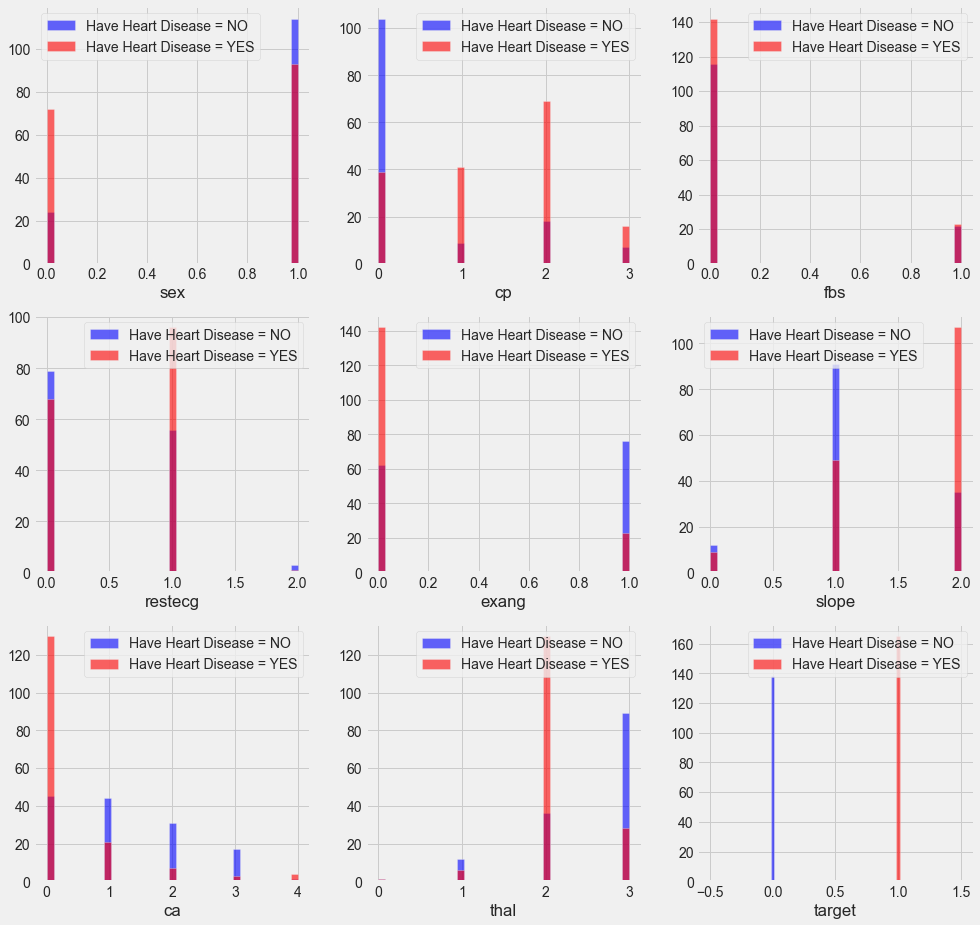

In [17]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

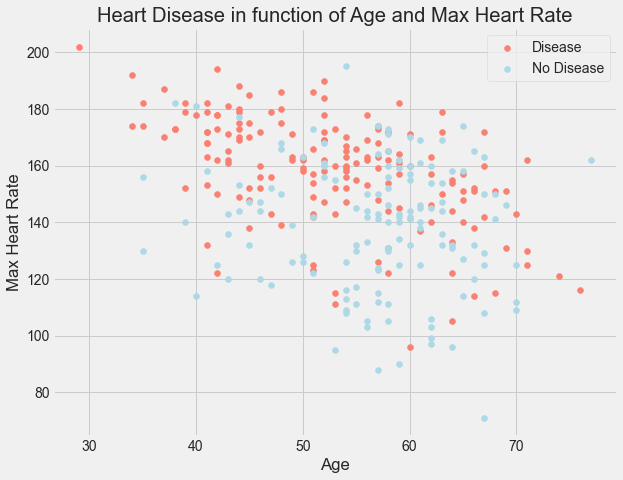

In [18]:
#age vs maximum heart rate for heart disease

plt.figure(figsize=(9, 7))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

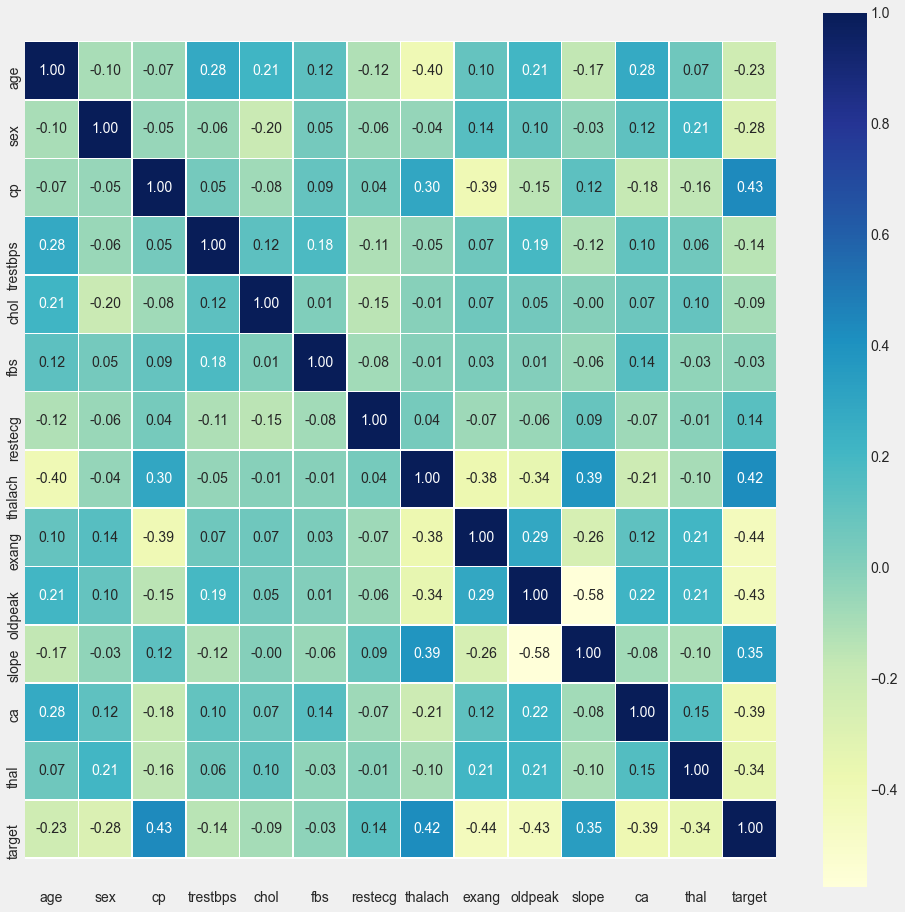

In [19]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation between Heart Disease and Numeric Features'}, ylabel='Numerical Features'>

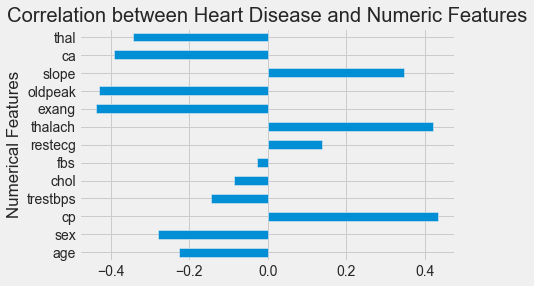

In [20]:
df.drop('target', axis=1).corrwith(df.target).plot(kind="barh",
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [23]:
#from sklearn.tree import DecisionTreeClassifier


#tree_clf = DecisionTreeClassifier(random_state=42)
#tree_clf.fit(X_train, y_train)

#print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [25]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))


0.8679245283018868
0.7692307692307693


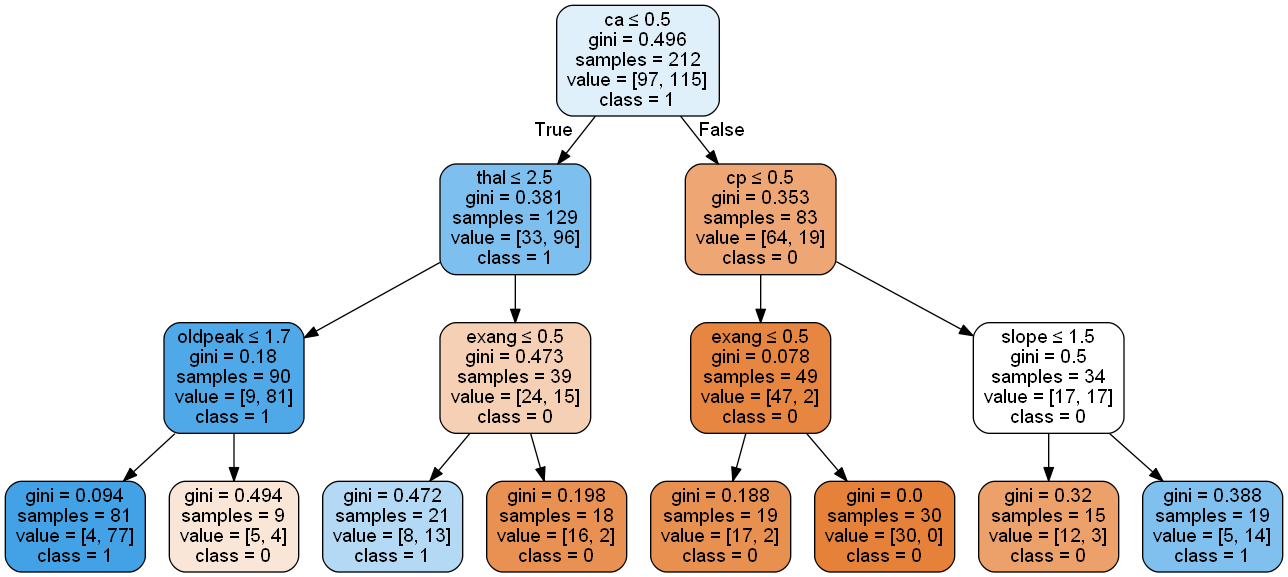

In [34]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = df.drop('target', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
path=clf_pruned.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00121598, 0.01957838, 0.02279047, 0.02359067,
       0.03992675, 0.06818274, 0.12650172])

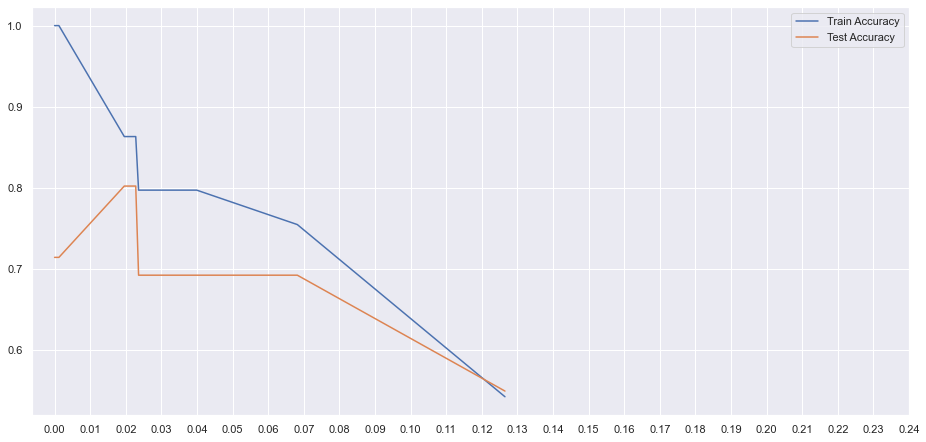

In [36]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [37]:
tree_1=DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
tree_1.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.5424528301886793
0.5494505494505495


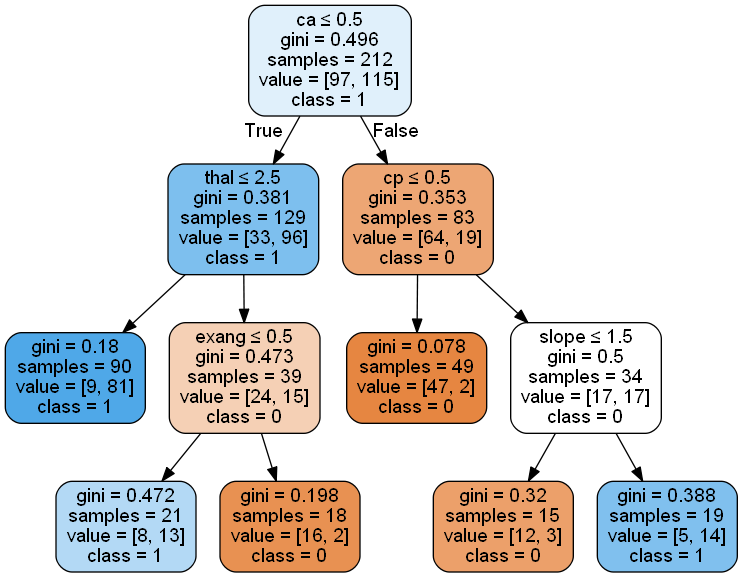

In [38]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = df.drop('target', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(tree_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())